# SoftTriple

## 1. Split training and test data
### CUB-200

In [2]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

import shutil

In [43]:
"""# 将图片数据集依照给定的标签划分成训练集和测试集
def split(data_path, origin, train, test):
    # 这个是数据集给的标注的测试集与训练集分类文件
    path = data_path +'train_test_split.txt'  # 这个路径请根据实际情况修改
    file = open(path)
    file_list = []
    for i in file:
        temp = "".join(i)
        temp = temp.replace('\n', '')
        temp_list = temp.split(" ")
        file_list.append(temp_list[1])
        
    #file2 = open(datapath + "images.txt")
    #image_list = []
    #for i in file2:
    #    temp = "".join(i)
    #    temp = temp.replace('\n', '')
    #    temp_list = temp.split(" ")
    #    image_list.append(temp_list[1])

    # 建立路径
    origin_path = data_path + origin # 这三个路径请根据实际环境修改
    train_path = data_path + train
    test_path = data_path + test
    label_path = os.listdir(origin_path)
    if not os.path.exists(train_path):
        os.mkdir(train_path)
        for path in label_path:
            os.mkdir(train_path + '/' + path)
    if not os.path.exists(test_path):
        os.mkdir(test_path)
        for path in label_path:
            os.mkdir(test_path + '/' + path)

    # 循环复制
    i = 0
    for path in label_path:
        for pic in os.listdir(origin_path + '/' + path):
            if file_list[i] == '1':
                try:
                    shutil.copy(origin_path + '/' + path + '/' + pic, train_path + '/' + path + '/' + pic)
                    print(i,"from " + origin_path + '/' + path + '/' + pic + " to " + train_path + '/' + path + '/' + pic)
                    i += 1
                except IOError as e:
                    print('Unable to copy file %s' % e)
            else:
                try:
                    shutil.copy(origin_path + '/' + path + '/' + pic, test_path + '/' + path + '/' + pic)
                    print(i,"from " + origin_path + '/' + path + '/' + pic + " to " + test_path + '/' + path + '/' + pic)
                    i += 1
                except IOError as e:
                    print('Unable to copy file %s' % e)"""

'# 将图片数据集依照给定的标签划分成训练集和测试集\ndef split(data_path, origin, train, test):\n    # 这个是数据集给的标注的测试集与训练集分类文件\n    path = data_path +\'train_test_split.txt\'  # 这个路径请根据实际情况修改\n    file = open(path)\n    file_list = []\n    for i in file:\n        temp = "".join(i)\n        temp = temp.replace(\'\n\', \'\')\n        temp_list = temp.split(" ")\n        file_list.append(temp_list[1])\n        \n    #file2 = open(datapath + "images.txt")\n    #image_list = []\n    #for i in file2:\n    #    temp = "".join(i)\n    #    temp = temp.replace(\'\n\', \'\')\n    #    temp_list = temp.split(" ")\n    #    image_list.append(temp_list[1])\n\n    # 建立路径\n    origin_path = data_path + origin # 这三个路径请根据实际环境修改\n    train_path = data_path + train\n    test_path = data_path + test\n    label_path = os.listdir(origin_path)\n    if not os.path.exists(train_path):\n        os.mkdir(train_path)\n        for path in label_path:\n            os.mkdir(train_path + \'/\' + path)\n    if not os.path.exists(test_path):\n 

In [44]:
"""imgPath = 'H:/study/academic/UCD/TeamProject/data/Caltech-UCSD_Birds-200-2011/2011/CUB_200_2011/'
origin = "images"
train = "train"
test = "test"

split(imgPath, origin, train, test)"""

'imgPath = \'H:/study/academic/UCD/TeamProject/data/Caltech-UCSD_Birds-200-2011/2011/CUB_200_2011/\'\norigin = "images"\ntrain = "train"\ntest = "test"\n\nsplit(imgPath, origin, train, test)'

### Car-196

In [45]:
"""imgPath = 'H:/study/academic/UCD/TeamProject/data/CarsDataset/'
trainPrefix = "train/"
testPrefix = "test/"
for lines in open('cars_annos.txt'):
    lines = lines.strip().split(',')
    classInd = int(lines[1])
    fname = lines[0].split('/')[1]
    if classInd <= 98:
        ddr = imgPath + trainPrefix + str(classInd)
        if not os.path.exists(ddr):
            os.makedirs(ddr)
        shutil.move(imgPath + lines[0], ddr + '/' + fname)
        print(imgPath + lines[0] +" to "+ ddr + '/' + fname)
    else:
        ddr = imgPath + testPrefix + lines[1]
        if not os.path.exists(ddr):
            os.makedirs(ddr)
        shutil.move(imgPath + lines[0], ddr + '/' + fname)
        print(imgPath + lines[0] +" to "+ ddr + '/' + fname)"""

'imgPath = \'H:/study/academic/UCD/TeamProject/data/CarsDataset/\'\ntrainPrefix = "train/"\ntestPrefix = "test/"\nfor lines in open(\'cars_annos.txt\'):\n    lines = lines.strip().split(\',\')\n    classInd = int(lines[1])\n    fname = lines[0].split(\'/\')[1]\n    if classInd <= 98:\n        ddr = imgPath + trainPrefix + str(classInd)\n        if not os.path.exists(ddr):\n            os.makedirs(ddr)\n        shutil.move(imgPath + lines[0], ddr + \'/\' + fname)\n        print(imgPath + lines[0] +" to "+ ddr + \'/\' + fname)\n    else:\n        ddr = imgPath + testPrefix + lines[1]\n        if not os.path.exists(ddr):\n            os.makedirs(ddr)\n        shutil.move(imgPath + lines[0], ddr + \'/\' + fname)\n        print(imgPath + lines[0] +" to "+ ddr + \'/\' + fname)'

### Load data

In [3]:
"""
    PyTorch Package for SoftTriple Loss

    Reference
    ICCV'19: "SoftTriple Loss: Deep Metric Learning Without Triplet Sampling"

    Copyright@Alibaba Group

"""

import argparse
import os
import torch
#import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim
import torch.utils.data
#import torch.utils.data.distributed
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
from PIL import Image

In [10]:
imgPath = 'H:/study/academic/UCD/TeamProject/data/Caltech-UCSD_Birds-200-2011/2011/CUB_200_2011/'
#imgPath = os.getcwd()+"/"
#imgPath = "H:/study/academic/UCD/TeamProject/TeamStaySafe-master/web/static/program/"
#imgPath = 'H:/study/academic/UCD/TeamProject/data/CarsDataset/'
data = imgPath
workers=0
epochs=10
start_epoch=0
batch=32
modellr=0.0001
centerlr=0.01
weight_decay=1e-4
gpu=0
eps=0.01
decay_rate=0.1
dim=64
freeze_BN=True
la=20
gamma=0.1
tau=0.2
margin=0.01
C=100
K=10

In [11]:
# load data
def RGB2BGR(im):
    assert im.mode == 'RGB'
    r, g, b = im.split()
    return Image.merge('RGB', (b, g, r))
def MUL(x):
    return x.mul(255)

fulldir = 'images/'
traindir = 'train1/'
testdir = 'test1/'
normalize = transforms.Normalize(mean=[104., 117., 128.],
                                 std=[1., 1., 1.])
"""
full_dataset = datasets.ImageFolder(
    imgPath + fulldir, 
    transforms.Compose([
        transforms.Lambda(RGB2BGR),
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Lambda(MUL),
        normalize,
    ]))

# train test split
train_size = int(0.7 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

"""
train_dataset = datasets.ImageFolder(
    imgPath + traindir,
    transforms.Compose([
        transforms.Lambda(RGB2BGR),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Lambda(MUL), #?????????????
        normalize,
    ]))

test_dataset = datasets.ImageFolder(
    imgPath + testdir, 
    transforms.Compose([
        transforms.Lambda(RGB2BGR),
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Lambda(MUL),
        normalize,
    ]))
    

# check if cuda is available for boost
cuda = torch.cuda.is_available()
kwargs = {'num_workers': workers, 'pin_memory': True} if cuda else {}
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch, shuffle=True,**kwargs)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch, shuffle=False,**kwargs)

In [12]:
print(len(train_loader.dataset))
print(len(test_loader.dataset))

5864
5924


## 2. Implementation of SoftTriple Loss

In [13]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.parameter import Parameter
from torch.nn import init

In [14]:
class SoftTriple(nn.Module):
    def __init__(self, la, gamma, tau, margin, dim, cN, K):
        super(SoftTriple, self).__init__()
        self.la = la
        self.gamma = 1./gamma
        self.tau = tau
        self.margin = margin
        self.cN = cN
        self.K = K
        self.fc = Parameter(torch.Tensor(dim, cN*K))
        self.weight = torch.zeros(cN*K, cN*K, dtype=torch.bool).cuda()
        for i in range(0, cN):
            for j in range(0, K):
                self.weight[i*K+j, i*K+j+1:(i+1)*K] = 1
        init.kaiming_uniform_(self.fc, a=math.sqrt(5))
        return

    def forward(self, input, target):
        centers = F.normalize(self.fc, p=2, dim=0)
        simInd = input.matmul(centers)
        simStruc = simInd.reshape(-1, self.cN, self.K)
        prob = F.softmax(simStruc*self.gamma, dim=2)
        simClass = torch.sum(prob*simStruc, dim=2)
        marginM = torch.zeros(simClass.shape).cuda()
        #print("Target:",target)
        marginM[torch.arange(0, marginM.shape[0]), target] = self.margin
        
        lossClassify = F.cross_entropy(self.la*(simClass-marginM), target)
        if self.tau > 0 and self.K > 1:
            simCenter = centers.t().matmul(centers)
            reg = torch.sum(torch.sqrt(2.0+1e-5-2.*simCenter[self.weight]))/(self.cN*self.K*(self.K-1.))
            return lossClassify+self.tau*reg
        else:
            return lossClassify


## 3. Implementation of BNInception

In [15]:
# modify from
# https://github.com/Cadene/pretrained-models.pytorch/blob/master/pretrainedmodels/models/bninception.py

from __future__ import print_function, division, absolute_import
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.model_zoo as model_zoo

In [16]:
__all__ = ['BNInception', 'bninception']

pretrained_settings = {
    'bninception': {
        'imagenet': {
            # Was ported using python2 (may trigger warning)
            'url': 'http://data.lip6.fr/cadene/pretrainedmodels/bn_inception-52deb4733.pth',
            'input_space': 'BGR',
            'input_size': [3, 224, 224],
            'input_range': [0, 255],
            'mean': [104, 117, 128],
            'std': [1, 1, 1],
            'num_classes': 1000
        }
    }
}

In [17]:
class BNInception(nn.Module):

    def __init__(self, dim=64):
        super(BNInception, self).__init__()
        inplace = True
        self.conv1_7x7_s2 = nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
        self.conv1_7x7_s2_bn = nn.BatchNorm2d(64, affine=True)
        self.conv1_relu_7x7 = nn.ReLU (inplace)
        self.pool1_3x3_s2 = nn.MaxPool2d ((3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=True)

        self.conv2_3x3_reduce = nn.Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
        self.conv2_3x3_reduce_bn = nn.BatchNorm2d(64, affine=True)
        self.conv2_relu_3x3_reduce = nn.ReLU (inplace)
        self.conv2_3x3 = nn.Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.conv2_3x3_bn = nn.BatchNorm2d(192, affine=True)
        self.conv2_relu_3x3 = nn.ReLU (inplace)
        self.pool2_3x3_s2 = nn.MaxPool2d ((3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=True)

        self.inception_3a_1x1 = nn.Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3a_1x1_bn = nn.BatchNorm2d(64, affine=True)
        self.inception_3a_relu_1x1 = nn.ReLU (inplace)
        self.inception_3a_3x3_reduce = nn.Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3a_3x3_reduce_bn = nn.BatchNorm2d(64, affine=True)
        self.inception_3a_relu_3x3_reduce = nn.ReLU (inplace)
        self.inception_3a_3x3 = nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3a_3x3_bn = nn.BatchNorm2d(64, affine=True)
        self.inception_3a_relu_3x3 = nn.ReLU (inplace)

        self.inception_3a_double_3x3_reduce = nn.Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3a_double_3x3_reduce_bn = nn.BatchNorm2d(64, affine=True)
        self.inception_3a_relu_double_3x3_reduce = nn.ReLU (inplace)
        self.inception_3a_double_3x3_1 = nn.Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3a_double_3x3_1_bn = nn.BatchNorm2d(96, affine=True)
        self.inception_3a_relu_double_3x3_1 = nn.ReLU (inplace)
        self.inception_3a_double_3x3_2 = nn.Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3a_double_3x3_2_bn = nn.BatchNorm2d(96, affine=True)
        self.inception_3a_relu_double_3x3_2 = nn.ReLU (inplace)

        self.inception_3a_pool = nn.AvgPool2d (3, stride=1, padding=1, ceil_mode=True, count_include_pad=True)
        self.inception_3a_pool_proj = nn.Conv2d(192, 32, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3a_pool_proj_bn = nn.BatchNorm2d(32, affine=True)
        self.inception_3a_relu_pool_proj = nn.ReLU (inplace)

        self.inception_3b_1x1 = nn.Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3b_1x1_bn = nn.BatchNorm2d(64, affine=True)
        self.inception_3b_relu_1x1 = nn.ReLU (inplace)
        self.inception_3b_3x3_reduce = nn.Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3b_3x3_reduce_bn = nn.BatchNorm2d(64, affine=True)
        self.inception_3b_relu_3x3_reduce = nn.ReLU (inplace)
        self.inception_3b_3x3 = nn.Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3b_3x3_bn = nn.BatchNorm2d(96, affine=True)
        self.inception_3b_relu_3x3 = nn.ReLU (inplace)

        self.inception_3b_double_3x3_reduce = nn.Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3b_double_3x3_reduce_bn = nn.BatchNorm2d(64, affine=True)
        self.inception_3b_relu_double_3x3_reduce = nn.ReLU (inplace)
        self.inception_3b_double_3x3_1 = nn.Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3b_double_3x3_1_bn = nn.BatchNorm2d(96, affine=True)
        self.inception_3b_relu_double_3x3_1 = nn.ReLU (inplace)
        self.inception_3b_double_3x3_2 = nn.Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3b_double_3x3_2_bn = nn.BatchNorm2d(96, affine=True)
        self.inception_3b_relu_double_3x3_2 = nn.ReLU (inplace)

        self.inception_3b_pool = nn.AvgPool2d (3, stride=1, padding=1, ceil_mode=True, count_include_pad=True)
        self.inception_3b_pool_proj = nn.Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3b_pool_proj_bn = nn.BatchNorm2d(64, affine=True)
        self.inception_3b_relu_pool_proj = nn.ReLU (inplace)

        self.inception_3c_3x3_reduce = nn.Conv2d(320, 128, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3c_3x3_reduce_bn = nn.BatchNorm2d(128, affine=True)
        self.inception_3c_relu_3x3_reduce = nn.ReLU (inplace)
        self.inception_3c_3x3 = nn.Conv2d(128, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.inception_3c_3x3_bn = nn.BatchNorm2d(160, affine=True)
        self.inception_3c_relu_3x3 = nn.ReLU (inplace)

        self.inception_3c_double_3x3_reduce = nn.Conv2d(320, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3c_double_3x3_reduce_bn = nn.BatchNorm2d(64, affine=True)
        self.inception_3c_relu_double_3x3_reduce = nn.ReLU (inplace)
        self.inception_3c_double_3x3_1 = nn.Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3c_double_3x3_1_bn = nn.BatchNorm2d(96, affine=True)
        self.inception_3c_relu_double_3x3_1 = nn.ReLU (inplace)
        self.inception_3c_double_3x3_2 = nn.Conv2d(96, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.inception_3c_double_3x3_2_bn = nn.BatchNorm2d(96, affine=True)
        self.inception_3c_relu_double_3x3_2 = nn.ReLU (inplace)

        self.inception_3c_pool = nn.MaxPool2d ((3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=True)

        self.inception_4a_1x1 = nn.Conv2d(576, 224, kernel_size=(1, 1), stride=(1, 1))
        self.inception_4a_1x1_bn = nn.BatchNorm2d(224, affine=True)
        self.inception_4a_relu_1x1 = nn.ReLU (inplace)
        self.inception_4a_3x3_reduce = nn.Conv2d(576, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_4a_3x3_reduce_bn = nn.BatchNorm2d(64, affine=True)
        self.inception_4a_relu_3x3_reduce = nn.ReLU (inplace)
        self.inception_4a_3x3 = nn.Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_4a_3x3_bn = nn.BatchNorm2d(96, affine=True)
        self.inception_4a_relu_3x3 = nn.ReLU (inplace)
        self.inception_4a_double_3x3_reduce = nn.Conv2d(576, 96, kernel_size=(1, 1), stride=(1, 1))
        self.inception_4a_double_3x3_reduce_bn = nn.BatchNorm2d(96, affine=True)
        self.inception_4a_relu_double_3x3_reduce = nn.ReLU (inplace)
        self.inception_4a_double_3x3_1 = nn.Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_4a_double_3x3_1_bn = nn.BatchNorm2d(128, affine=True)
        self.inception_4a_relu_double_3x3_1 = nn.ReLU (inplace)
        self.inception_4a_double_3x3_2 = nn.Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_4a_double_3x3_2_bn = nn.BatchNorm2d(128, affine=True)
        self.inception_4a_relu_double_3x3_2 = nn.ReLU (inplace)
        self.inception_4a_pool = nn.AvgPool2d (3, stride=1, padding=1, ceil_mode=True, count_include_pad=True)
        self.inception_4a_pool_proj = nn.Conv2d(576, 128, kernel_size=(1, 1), stride=(1, 1))
        self.inception_4a_pool_proj_bn = nn.BatchNorm2d(128, affine=True)
        self.inception_4a_relu_pool_proj = nn.ReLU (inplace)

        self.inception_4b_1x1 = nn.Conv2d(576, 192, kernel_size=(1, 1), stride=(1, 1))
        self.inception_4b_1x1_bn = nn.BatchNorm2d(192, affine=True)
        self.inception_4b_relu_1x1 = nn.ReLU (inplace)
        self.inception_4b_3x3_reduce = nn.Conv2d(576, 96, kernel_size=(1, 1), stride=(1, 1))
        self.inception_4b_3x3_reduce_bn = nn.BatchNorm2d(96, affine=True)
        self.inception_4b_relu_3x3_reduce = nn.ReLU (inplace)
        self.inception_4b_3x3 = nn.Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_4b_3x3_bn = nn.BatchNorm2d(128, affine=True)
        self.inception_4b_relu_3x3 = nn.ReLU (inplace)
        self.inception_4b_double_3x3_reduce = nn.Conv2d(576, 96, kernel_size=(1, 1), stride=(1, 1))
        self.inception_4b_double_3x3_reduce_bn = nn.BatchNorm2d(96, affine=True)
        self.inception_4b_relu_double_3x3_reduce = nn.ReLU (inplace)
        self.inception_4b_double_3x3_1 = nn.Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_4b_double_3x3_1_bn = nn.BatchNorm2d(128, affine=True)
        self.inception_4b_relu_double_3x3_1 = nn.ReLU (inplace)
        self.inception_4b_double_3x3_2 = nn.Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_4b_double_3x3_2_bn = nn.BatchNorm2d(128, affine=True)
        self.inception_4b_relu_double_3x3_2 = nn.ReLU (inplace)
        self.inception_4b_pool = nn.AvgPool2d (3, stride=1, padding=1, ceil_mode=True, count_include_pad=True)
        self.inception_4b_pool_proj = nn.Conv2d(576, 128, kernel_size=(1, 1), stride=(1, 1))
        self.inception_4b_pool_proj_bn = nn.BatchNorm2d(128, affine=True)
        self.inception_4b_relu_pool_proj = nn.ReLU (inplace)

        self.inception_4c_1x1 = nn.Conv2d(576, 160, kernel_size=(1, 1), stride=(1, 1))
        self.inception_4c_1x1_bn = nn.BatchNorm2d(160, affine=True)
        self.inception_4c_relu_1x1 = nn.ReLU (inplace)
        self.inception_4c_3x3_reduce = nn.Conv2d(576, 128, kernel_size=(1, 1), stride=(1, 1))
        self.inception_4c_3x3_reduce_bn = nn.BatchNorm2d(128, affine=True)
        self.inception_4c_relu_3x3_reduce = nn.ReLU (inplace)
        self.inception_4c_3x3 = nn.Conv2d(128, 160, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_4c_3x3_bn = nn.BatchNorm2d(160, affine=True)
        self.inception_4c_relu_3x3 = nn.ReLU (inplace)
        self.inception_4c_double_3x3_reduce = nn.Conv2d(576, 128, kernel_size=(1, 1), stride=(1, 1))
        self.inception_4c_double_3x3_reduce_bn = nn.BatchNorm2d(128, affine=True)
        self.inception_4c_relu_double_3x3_reduce = nn.ReLU (inplace)
        self.inception_4c_double_3x3_1 = nn.Conv2d(128, 160, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_4c_double_3x3_1_bn = nn.BatchNorm2d(160, affine=True)
        self.inception_4c_relu_double_3x3_1 = nn.ReLU (inplace)
        self.inception_4c_double_3x3_2 = nn.Conv2d(160, 160, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_4c_double_3x3_2_bn = nn.BatchNorm2d(160, affine=True)
        self.inception_4c_relu_double_3x3_2 = nn.ReLU (inplace)
        self.inception_4c_pool = nn.AvgPool2d (3, stride=1, padding=1, ceil_mode=True, count_include_pad=True)
        self.inception_4c_pool_proj = nn.Conv2d(576, 128, kernel_size=(1, 1), stride=(1, 1))
        self.inception_4c_pool_proj_bn = nn.BatchNorm2d(128, affine=True)
        self.inception_4c_relu_pool_proj = nn.ReLU (inplace)

        self.inception_4d_1x1 = nn.Conv2d(608, 96, kernel_size=(1, 1), stride=(1, 1))
        self.inception_4d_1x1_bn = nn.BatchNorm2d(96, affine=True)
        self.inception_4d_relu_1x1 = nn.ReLU (inplace)
        self.inception_4d_3x3_reduce = nn.Conv2d(608, 128, kernel_size=(1, 1), stride=(1, 1))
        self.inception_4d_3x3_reduce_bn = nn.BatchNorm2d(128, affine=True)
        self.inception_4d_relu_3x3_reduce = nn.ReLU (inplace)
        self.inception_4d_3x3 = nn.Conv2d(128, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_4d_3x3_bn = nn.BatchNorm2d(192, affine=True)
        self.inception_4d_relu_3x3 = nn.ReLU (inplace)
        self.inception_4d_double_3x3_reduce = nn.Conv2d(608, 160, kernel_size=(1, 1), stride=(1, 1))
        self.inception_4d_double_3x3_reduce_bn = nn.BatchNorm2d(160, affine=True)
        self.inception_4d_relu_double_3x3_reduce = nn.ReLU (inplace)
        self.inception_4d_double_3x3_1 = nn.Conv2d(160, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_4d_double_3x3_1_bn = nn.BatchNorm2d(192, affine=True)
        self.inception_4d_relu_double_3x3_1 = nn.ReLU (inplace)
        self.inception_4d_double_3x3_2 = nn.Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_4d_double_3x3_2_bn = nn.BatchNorm2d(192, affine=True)
        self.inception_4d_relu_double_3x3_2 = nn.ReLU (inplace)
        self.inception_4d_pool = nn.AvgPool2d (3, stride=1, padding=1, ceil_mode=True, count_include_pad=True)
        self.inception_4d_pool_proj = nn.Conv2d(608, 128, kernel_size=(1, 1), stride=(1, 1))
        self.inception_4d_pool_proj_bn = nn.BatchNorm2d(128, affine=True)
        self.inception_4d_relu_pool_proj = nn.ReLU (inplace)

        self.inception_4e_3x3_reduce = nn.Conv2d(608, 128, kernel_size=(1, 1), stride=(1, 1))
        self.inception_4e_3x3_reduce_bn = nn.BatchNorm2d(128, affine=True)
        self.inception_4e_relu_3x3_reduce = nn.ReLU (inplace)
        self.inception_4e_3x3 = nn.Conv2d(128, 192, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.inception_4e_3x3_bn = nn.BatchNorm2d(192, affine=True)
        self.inception_4e_relu_3x3 = nn.ReLU (inplace)
        self.inception_4e_double_3x3_reduce = nn.Conv2d(608, 192, kernel_size=(1, 1), stride=(1, 1))
        self.inception_4e_double_3x3_reduce_bn = nn.BatchNorm2d(192, affine=True)
        self.inception_4e_relu_double_3x3_reduce = nn.ReLU (inplace)
        self.inception_4e_double_3x3_1 = nn.Conv2d(192, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_4e_double_3x3_1_bn = nn.BatchNorm2d(256, affine=True)
        self.inception_4e_relu_double_3x3_1 = nn.ReLU (inplace)
        self.inception_4e_double_3x3_2 = nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.inception_4e_double_3x3_2_bn = nn.BatchNorm2d(256, affine=True)
        self.inception_4e_relu_double_3x3_2 = nn.ReLU (inplace)
        self.inception_4e_pool = nn.MaxPool2d ((3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=True)

        self.inception_5a_1x1 = nn.Conv2d(1056, 352, kernel_size=(1, 1), stride=(1, 1))
        self.inception_5a_1x1_bn = nn.BatchNorm2d(352, affine=True)
        self.inception_5a_relu_1x1 = nn.ReLU (inplace)
        self.inception_5a_3x3_reduce = nn.Conv2d(1056, 192, kernel_size=(1, 1), stride=(1, 1))
        self.inception_5a_3x3_reduce_bn = nn.BatchNorm2d(192, affine=True)
        self.inception_5a_relu_3x3_reduce = nn.ReLU (inplace)
        self.inception_5a_3x3 = nn.Conv2d(192, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_5a_3x3_bn = nn.BatchNorm2d(320, affine=True)
        self.inception_5a_relu_3x3 = nn.ReLU (inplace)
        self.inception_5a_double_3x3_reduce = nn.Conv2d(1056, 160, kernel_size=(1, 1), stride=(1, 1))
        self.inception_5a_double_3x3_reduce_bn = nn.BatchNorm2d(160, affine=True)
        self.inception_5a_relu_double_3x3_reduce = nn.ReLU (inplace)
        self.inception_5a_double_3x3_1 = nn.Conv2d(160, 224, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_5a_double_3x3_1_bn = nn.BatchNorm2d(224, affine=True)
        self.inception_5a_relu_double_3x3_1 = nn.ReLU (inplace)
        self.inception_5a_double_3x3_2 = nn.Conv2d(224, 224, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_5a_double_3x3_2_bn = nn.BatchNorm2d(224, affine=True)
        self.inception_5a_relu_double_3x3_2 = nn.ReLU (inplace)
        self.inception_5a_pool = nn.AvgPool2d (3, stride=1, padding=1, ceil_mode=True, count_include_pad=True)
        self.inception_5a_pool_proj = nn.Conv2d(1056, 128, kernel_size=(1, 1), stride=(1, 1))
        self.inception_5a_pool_proj_bn = nn.BatchNorm2d(128, affine=True)
        self.inception_5a_relu_pool_proj = nn.ReLU (inplace)

        self.inception_5b_1x1 = nn.Conv2d(1024, 352, kernel_size=(1, 1), stride=(1, 1))
        self.inception_5b_1x1_bn = nn.BatchNorm2d(352, affine=True)
        self.inception_5b_relu_1x1 = nn.ReLU (inplace)
        self.inception_5b_3x3_reduce = nn.Conv2d(1024, 192, kernel_size=(1, 1), stride=(1, 1))
        self.inception_5b_3x3_reduce_bn = nn.BatchNorm2d(192, affine=True)
        self.inception_5b_relu_3x3_reduce = nn.ReLU (inplace)
        self.inception_5b_3x3 = nn.Conv2d(192, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_5b_3x3_bn = nn.BatchNorm2d(320, affine=True)
        self.inception_5b_relu_3x3 = nn.ReLU(inplace)
        self.inception_5b_double_3x3_reduce = nn.Conv2d(1024, 192, kernel_size=(1, 1), stride=(1, 1))
        self.inception_5b_double_3x3_reduce_bn = nn.BatchNorm2d(192, affine=True)
        self.inception_5b_relu_double_3x3_reduce = nn.ReLU (inplace)
        self.inception_5b_double_3x3_1 = nn.Conv2d(192, 224, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_5b_double_3x3_1_bn = nn.BatchNorm2d(224, affine=True)
        self.inception_5b_relu_double_3x3_1 = nn.ReLU (inplace)
        self.inception_5b_double_3x3_2 = nn.Conv2d(224, 224, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_5b_double_3x3_2_bn = nn.BatchNorm2d(224, affine=True)
        self.inception_5b_relu_double_3x3_2 = nn.ReLU(inplace)
        self.inception_5b_pool = nn.MaxPool2d ((3, 3), stride=(1, 1), padding=(1, 1), dilation=(1, 1), ceil_mode=True)
        self.inception_5b_pool_proj = nn.Conv2d(1024, 128, kernel_size=(1, 1), stride=(1, 1))
        self.inception_5b_pool_proj_bn = nn.BatchNorm2d(128, affine=True)
        self.inception_5b_relu_pool_proj = nn.ReLU(inplace)

        self.embedding = nn.Linear(1024, dim)

    def features(self, input):
        conv1_7x7_s2_out = self.conv1_7x7_s2(input)
        conv1_7x7_s2_bn_out = self.conv1_7x7_s2_bn(conv1_7x7_s2_out)
        conv1_relu_7x7_out = self.conv1_relu_7x7(conv1_7x7_s2_bn_out)
        pool1_3x3_s2_out = self.pool1_3x3_s2(conv1_relu_7x7_out)

        conv2_3x3_reduce_out = self.conv2_3x3_reduce(pool1_3x3_s2_out)
        conv2_3x3_reduce_bn_out = self.conv2_3x3_reduce_bn(conv2_3x3_reduce_out)
        conv2_relu_3x3_reduce_out = self.conv2_relu_3x3_reduce(conv2_3x3_reduce_bn_out)
        conv2_3x3_out = self.conv2_3x3(conv2_relu_3x3_reduce_out)
        conv2_3x3_bn_out = self.conv2_3x3_bn(conv2_3x3_out)
        conv2_relu_3x3_out = self.conv2_relu_3x3(conv2_3x3_bn_out)
        pool2_3x3_s2_out = self.pool2_3x3_s2(conv2_relu_3x3_out)

        inception_3a_1x1_out = self.inception_3a_1x1(pool2_3x3_s2_out)
        inception_3a_1x1_bn_out = self.inception_3a_1x1_bn(inception_3a_1x1_out)
        inception_3a_relu_1x1_out = self.inception_3a_relu_1x1(inception_3a_1x1_bn_out)
        inception_3a_3x3_reduce_out = self.inception_3a_3x3_reduce(pool2_3x3_s2_out)
        inception_3a_3x3_reduce_bn_out = self.inception_3a_3x3_reduce_bn(inception_3a_3x3_reduce_out)
        inception_3a_relu_3x3_reduce_out = self.inception_3a_relu_3x3_reduce(inception_3a_3x3_reduce_bn_out)
        inception_3a_3x3_out = self.inception_3a_3x3(inception_3a_relu_3x3_reduce_out)
        inception_3a_3x3_bn_out = self.inception_3a_3x3_bn(inception_3a_3x3_out)
        inception_3a_relu_3x3_out = self.inception_3a_relu_3x3(inception_3a_3x3_bn_out)
        inception_3a_double_3x3_reduce_out = self.inception_3a_double_3x3_reduce(pool2_3x3_s2_out)
        inception_3a_double_3x3_reduce_bn_out = self.inception_3a_double_3x3_reduce_bn(inception_3a_double_3x3_reduce_out)
        inception_3a_relu_double_3x3_reduce_out = self.inception_3a_relu_double_3x3_reduce(inception_3a_double_3x3_reduce_bn_out)
        inception_3a_double_3x3_1_out = self.inception_3a_double_3x3_1(inception_3a_relu_double_3x3_reduce_out)
        inception_3a_double_3x3_1_bn_out = self.inception_3a_double_3x3_1_bn(inception_3a_double_3x3_1_out)
        inception_3a_relu_double_3x3_1_out = self.inception_3a_relu_double_3x3_1(inception_3a_double_3x3_1_bn_out)
        inception_3a_double_3x3_2_out = self.inception_3a_double_3x3_2(inception_3a_relu_double_3x3_1_out)
        inception_3a_double_3x3_2_bn_out = self.inception_3a_double_3x3_2_bn(inception_3a_double_3x3_2_out)
        inception_3a_relu_double_3x3_2_out = self.inception_3a_relu_double_3x3_2(inception_3a_double_3x3_2_bn_out)
        inception_3a_pool_out = self.inception_3a_pool(pool2_3x3_s2_out)
        inception_3a_pool_proj_out = self.inception_3a_pool_proj(inception_3a_pool_out)
        inception_3a_pool_proj_bn_out = self.inception_3a_pool_proj_bn(inception_3a_pool_proj_out)
        inception_3a_relu_pool_proj_out = self.inception_3a_relu_pool_proj(inception_3a_pool_proj_bn_out)
        inception_3a_output_out = torch.cat([inception_3a_relu_1x1_out,inception_3a_relu_3x3_out,inception_3a_relu_double_3x3_2_out ,inception_3a_relu_pool_proj_out], 1)
        inception_3b_1x1_out = self.inception_3b_1x1(inception_3a_output_out)
        inception_3b_1x1_bn_out = self.inception_3b_1x1_bn(inception_3b_1x1_out)
        inception_3b_relu_1x1_out = self.inception_3b_relu_1x1(inception_3b_1x1_bn_out)
        inception_3b_3x3_reduce_out = self.inception_3b_3x3_reduce(inception_3a_output_out)
        inception_3b_3x3_reduce_bn_out = self.inception_3b_3x3_reduce_bn(inception_3b_3x3_reduce_out)
        inception_3b_relu_3x3_reduce_out = self.inception_3b_relu_3x3_reduce(inception_3b_3x3_reduce_bn_out)
        inception_3b_3x3_out = self.inception_3b_3x3(inception_3b_relu_3x3_reduce_out)
        inception_3b_3x3_bn_out = self.inception_3b_3x3_bn(inception_3b_3x3_out)
        inception_3b_relu_3x3_out = self.inception_3b_relu_3x3(inception_3b_3x3_bn_out)
        inception_3b_double_3x3_reduce_out = self.inception_3b_double_3x3_reduce(inception_3a_output_out)
        inception_3b_double_3x3_reduce_bn_out = self.inception_3b_double_3x3_reduce_bn(inception_3b_double_3x3_reduce_out)
        inception_3b_relu_double_3x3_reduce_out = self.inception_3b_relu_double_3x3_reduce(inception_3b_double_3x3_reduce_bn_out)
        inception_3b_double_3x3_1_out = self.inception_3b_double_3x3_1(inception_3b_relu_double_3x3_reduce_out)
        inception_3b_double_3x3_1_bn_out = self.inception_3b_double_3x3_1_bn(inception_3b_double_3x3_1_out)
        inception_3b_relu_double_3x3_1_out = self.inception_3b_relu_double_3x3_1(inception_3b_double_3x3_1_bn_out)
        inception_3b_double_3x3_2_out = self.inception_3b_double_3x3_2(inception_3b_relu_double_3x3_1_out)
        inception_3b_double_3x3_2_bn_out = self.inception_3b_double_3x3_2_bn(inception_3b_double_3x3_2_out)
        inception_3b_relu_double_3x3_2_out = self.inception_3b_relu_double_3x3_2(inception_3b_double_3x3_2_bn_out)
        inception_3b_pool_out = self.inception_3b_pool(inception_3a_output_out)
        inception_3b_pool_proj_out = self.inception_3b_pool_proj(inception_3b_pool_out)
        inception_3b_pool_proj_bn_out = self.inception_3b_pool_proj_bn(inception_3b_pool_proj_out)
        inception_3b_relu_pool_proj_out = self.inception_3b_relu_pool_proj(inception_3b_pool_proj_bn_out)
        inception_3b_output_out = torch.cat([inception_3b_relu_1x1_out,inception_3b_relu_3x3_out,inception_3b_relu_double_3x3_2_out,inception_3b_relu_pool_proj_out], 1)
        inception_3c_3x3_reduce_out = self.inception_3c_3x3_reduce(inception_3b_output_out)
        inception_3c_3x3_reduce_bn_out = self.inception_3c_3x3_reduce_bn(inception_3c_3x3_reduce_out)
        inception_3c_relu_3x3_reduce_out = self.inception_3c_relu_3x3_reduce(inception_3c_3x3_reduce_bn_out)
        inception_3c_3x3_out = self.inception_3c_3x3(inception_3c_relu_3x3_reduce_out)
        inception_3c_3x3_bn_out = self.inception_3c_3x3_bn(inception_3c_3x3_out)
        inception_3c_relu_3x3_out = self.inception_3c_relu_3x3(inception_3c_3x3_bn_out)
        inception_3c_double_3x3_reduce_out = self.inception_3c_double_3x3_reduce(inception_3b_output_out)
        inception_3c_double_3x3_reduce_bn_out = self.inception_3c_double_3x3_reduce_bn(inception_3c_double_3x3_reduce_out)
        inception_3c_relu_double_3x3_reduce_out = self.inception_3c_relu_double_3x3_reduce(inception_3c_double_3x3_reduce_bn_out)
        inception_3c_double_3x3_1_out = self.inception_3c_double_3x3_1(inception_3c_relu_double_3x3_reduce_out)
        inception_3c_double_3x3_1_bn_out = self.inception_3c_double_3x3_1_bn(inception_3c_double_3x3_1_out)
        inception_3c_relu_double_3x3_1_out = self.inception_3c_relu_double_3x3_1(inception_3c_double_3x3_1_bn_out)
        inception_3c_double_3x3_2_out = self.inception_3c_double_3x3_2(inception_3c_relu_double_3x3_1_out)
        inception_3c_double_3x3_2_bn_out = self.inception_3c_double_3x3_2_bn(inception_3c_double_3x3_2_out)
        inception_3c_relu_double_3x3_2_out = self.inception_3c_relu_double_3x3_2(inception_3c_double_3x3_2_bn_out)
        inception_3c_pool_out = self.inception_3c_pool(inception_3b_output_out)
        inception_3c_output_out = torch.cat([inception_3c_relu_3x3_out,inception_3c_relu_double_3x3_2_out,inception_3c_pool_out], 1)
        inception_4a_1x1_out = self.inception_4a_1x1(inception_3c_output_out)
        inception_4a_1x1_bn_out = self.inception_4a_1x1_bn(inception_4a_1x1_out)
        inception_4a_relu_1x1_out = self.inception_4a_relu_1x1(inception_4a_1x1_bn_out)
        inception_4a_3x3_reduce_out = self.inception_4a_3x3_reduce(inception_3c_output_out)
        inception_4a_3x3_reduce_bn_out = self.inception_4a_3x3_reduce_bn(inception_4a_3x3_reduce_out)
        inception_4a_relu_3x3_reduce_out = self.inception_4a_relu_3x3_reduce(inception_4a_3x3_reduce_bn_out)
        inception_4a_3x3_out = self.inception_4a_3x3(inception_4a_relu_3x3_reduce_out)
        inception_4a_3x3_bn_out = self.inception_4a_3x3_bn(inception_4a_3x3_out)
        inception_4a_relu_3x3_out = self.inception_4a_relu_3x3(inception_4a_3x3_bn_out)
        inception_4a_double_3x3_reduce_out = self.inception_4a_double_3x3_reduce(inception_3c_output_out)
        inception_4a_double_3x3_reduce_bn_out = self.inception_4a_double_3x3_reduce_bn(inception_4a_double_3x3_reduce_out)
        inception_4a_relu_double_3x3_reduce_out = self.inception_4a_relu_double_3x3_reduce(inception_4a_double_3x3_reduce_bn_out)
        inception_4a_double_3x3_1_out = self.inception_4a_double_3x3_1(inception_4a_relu_double_3x3_reduce_out)
        inception_4a_double_3x3_1_bn_out = self.inception_4a_double_3x3_1_bn(inception_4a_double_3x3_1_out)
        inception_4a_relu_double_3x3_1_out = self.inception_4a_relu_double_3x3_1(inception_4a_double_3x3_1_bn_out)
        inception_4a_double_3x3_2_out = self.inception_4a_double_3x3_2(inception_4a_relu_double_3x3_1_out)
        inception_4a_double_3x3_2_bn_out = self.inception_4a_double_3x3_2_bn(inception_4a_double_3x3_2_out)
        inception_4a_relu_double_3x3_2_out = self.inception_4a_relu_double_3x3_2(inception_4a_double_3x3_2_bn_out)
        inception_4a_pool_out = self.inception_4a_pool(inception_3c_output_out)
        inception_4a_pool_proj_out = self.inception_4a_pool_proj(inception_4a_pool_out)
        inception_4a_pool_proj_bn_out = self.inception_4a_pool_proj_bn(inception_4a_pool_proj_out)
        inception_4a_relu_pool_proj_out = self.inception_4a_relu_pool_proj(inception_4a_pool_proj_bn_out)
        inception_4a_output_out = torch.cat([inception_4a_relu_1x1_out,inception_4a_relu_3x3_out,inception_4a_relu_double_3x3_2_out,inception_4a_relu_pool_proj_out], 1)
        inception_4b_1x1_out = self.inception_4b_1x1(inception_4a_output_out)
        inception_4b_1x1_bn_out = self.inception_4b_1x1_bn(inception_4b_1x1_out)
        inception_4b_relu_1x1_out = self.inception_4b_relu_1x1(inception_4b_1x1_bn_out)
        inception_4b_3x3_reduce_out = self.inception_4b_3x3_reduce(inception_4a_output_out)
        inception_4b_3x3_reduce_bn_out = self.inception_4b_3x3_reduce_bn(inception_4b_3x3_reduce_out)
        inception_4b_relu_3x3_reduce_out = self.inception_4b_relu_3x3_reduce(inception_4b_3x3_reduce_bn_out)
        inception_4b_3x3_out = self.inception_4b_3x3(inception_4b_relu_3x3_reduce_out)
        inception_4b_3x3_bn_out = self.inception_4b_3x3_bn(inception_4b_3x3_out)
        inception_4b_relu_3x3_out = self.inception_4b_relu_3x3(inception_4b_3x3_bn_out)
        inception_4b_double_3x3_reduce_out = self.inception_4b_double_3x3_reduce(inception_4a_output_out)
        inception_4b_double_3x3_reduce_bn_out = self.inception_4b_double_3x3_reduce_bn(inception_4b_double_3x3_reduce_out)
        inception_4b_relu_double_3x3_reduce_out = self.inception_4b_relu_double_3x3_reduce(inception_4b_double_3x3_reduce_bn_out)
        inception_4b_double_3x3_1_out = self.inception_4b_double_3x3_1(inception_4b_relu_double_3x3_reduce_out)
        inception_4b_double_3x3_1_bn_out = self.inception_4b_double_3x3_1_bn(inception_4b_double_3x3_1_out)
        inception_4b_relu_double_3x3_1_out = self.inception_4b_relu_double_3x3_1(inception_4b_double_3x3_1_bn_out)
        inception_4b_double_3x3_2_out = self.inception_4b_double_3x3_2(inception_4b_relu_double_3x3_1_out)
        inception_4b_double_3x3_2_bn_out = self.inception_4b_double_3x3_2_bn(inception_4b_double_3x3_2_out)
        inception_4b_relu_double_3x3_2_out = self.inception_4b_relu_double_3x3_2(inception_4b_double_3x3_2_bn_out)
        inception_4b_pool_out = self.inception_4b_pool(inception_4a_output_out)
        inception_4b_pool_proj_out = self.inception_4b_pool_proj(inception_4b_pool_out)
        inception_4b_pool_proj_bn_out = self.inception_4b_pool_proj_bn(inception_4b_pool_proj_out)
        inception_4b_relu_pool_proj_out = self.inception_4b_relu_pool_proj(inception_4b_pool_proj_bn_out)
        inception_4b_output_out = torch.cat([inception_4b_relu_1x1_out,inception_4b_relu_3x3_out,inception_4b_relu_double_3x3_2_out,inception_4b_relu_pool_proj_out], 1)
        inception_4c_1x1_out = self.inception_4c_1x1(inception_4b_output_out)
        inception_4c_1x1_bn_out = self.inception_4c_1x1_bn(inception_4c_1x1_out)
        inception_4c_relu_1x1_out = self.inception_4c_relu_1x1(inception_4c_1x1_bn_out)
        inception_4c_3x3_reduce_out = self.inception_4c_3x3_reduce(inception_4b_output_out)
        inception_4c_3x3_reduce_bn_out = self.inception_4c_3x3_reduce_bn(inception_4c_3x3_reduce_out)
        inception_4c_relu_3x3_reduce_out = self.inception_4c_relu_3x3_reduce(inception_4c_3x3_reduce_bn_out)
        inception_4c_3x3_out = self.inception_4c_3x3(inception_4c_relu_3x3_reduce_out)
        inception_4c_3x3_bn_out = self.inception_4c_3x3_bn(inception_4c_3x3_out)
        inception_4c_relu_3x3_out = self.inception_4c_relu_3x3(inception_4c_3x3_bn_out)
        inception_4c_double_3x3_reduce_out = self.inception_4c_double_3x3_reduce(inception_4b_output_out)
        inception_4c_double_3x3_reduce_bn_out = self.inception_4c_double_3x3_reduce_bn(inception_4c_double_3x3_reduce_out)
        inception_4c_relu_double_3x3_reduce_out = self.inception_4c_relu_double_3x3_reduce(inception_4c_double_3x3_reduce_bn_out)
        inception_4c_double_3x3_1_out = self.inception_4c_double_3x3_1(inception_4c_relu_double_3x3_reduce_out)
        inception_4c_double_3x3_1_bn_out = self.inception_4c_double_3x3_1_bn(inception_4c_double_3x3_1_out)
        inception_4c_relu_double_3x3_1_out = self.inception_4c_relu_double_3x3_1(inception_4c_double_3x3_1_bn_out)
        inception_4c_double_3x3_2_out = self.inception_4c_double_3x3_2(inception_4c_relu_double_3x3_1_out)
        inception_4c_double_3x3_2_bn_out = self.inception_4c_double_3x3_2_bn(inception_4c_double_3x3_2_out)
        inception_4c_relu_double_3x3_2_out = self.inception_4c_relu_double_3x3_2(inception_4c_double_3x3_2_bn_out)
        inception_4c_pool_out = self.inception_4c_pool(inception_4b_output_out)
        inception_4c_pool_proj_out = self.inception_4c_pool_proj(inception_4c_pool_out)
        inception_4c_pool_proj_bn_out = self.inception_4c_pool_proj_bn(inception_4c_pool_proj_out)
        inception_4c_relu_pool_proj_out = self.inception_4c_relu_pool_proj(inception_4c_pool_proj_bn_out)
        inception_4c_output_out = torch.cat([inception_4c_relu_1x1_out,inception_4c_relu_3x3_out,inception_4c_relu_double_3x3_2_out,inception_4c_relu_pool_proj_out], 1)
        inception_4d_1x1_out = self.inception_4d_1x1(inception_4c_output_out)
        inception_4d_1x1_bn_out = self.inception_4d_1x1_bn(inception_4d_1x1_out)
        inception_4d_relu_1x1_out = self.inception_4d_relu_1x1(inception_4d_1x1_bn_out)
        inception_4d_3x3_reduce_out = self.inception_4d_3x3_reduce(inception_4c_output_out)
        inception_4d_3x3_reduce_bn_out = self.inception_4d_3x3_reduce_bn(inception_4d_3x3_reduce_out)
        inception_4d_relu_3x3_reduce_out = self.inception_4d_relu_3x3_reduce(inception_4d_3x3_reduce_bn_out)
        inception_4d_3x3_out = self.inception_4d_3x3(inception_4d_relu_3x3_reduce_out)
        inception_4d_3x3_bn_out = self.inception_4d_3x3_bn(inception_4d_3x3_out)
        inception_4d_relu_3x3_out = self.inception_4d_relu_3x3(inception_4d_3x3_bn_out)
        inception_4d_double_3x3_reduce_out = self.inception_4d_double_3x3_reduce(inception_4c_output_out)
        inception_4d_double_3x3_reduce_bn_out = self.inception_4d_double_3x3_reduce_bn(inception_4d_double_3x3_reduce_out)
        inception_4d_relu_double_3x3_reduce_out = self.inception_4d_relu_double_3x3_reduce(inception_4d_double_3x3_reduce_bn_out)
        inception_4d_double_3x3_1_out = self.inception_4d_double_3x3_1(inception_4d_relu_double_3x3_reduce_out)
        inception_4d_double_3x3_1_bn_out = self.inception_4d_double_3x3_1_bn(inception_4d_double_3x3_1_out)
        inception_4d_relu_double_3x3_1_out = self.inception_4d_relu_double_3x3_1(inception_4d_double_3x3_1_bn_out)
        inception_4d_double_3x3_2_out = self.inception_4d_double_3x3_2(inception_4d_relu_double_3x3_1_out)
        inception_4d_double_3x3_2_bn_out = self.inception_4d_double_3x3_2_bn(inception_4d_double_3x3_2_out)
        inception_4d_relu_double_3x3_2_out = self.inception_4d_relu_double_3x3_2(inception_4d_double_3x3_2_bn_out)
        inception_4d_pool_out = self.inception_4d_pool(inception_4c_output_out)
        inception_4d_pool_proj_out = self.inception_4d_pool_proj(inception_4d_pool_out)
        inception_4d_pool_proj_bn_out = self.inception_4d_pool_proj_bn(inception_4d_pool_proj_out)
        inception_4d_relu_pool_proj_out = self.inception_4d_relu_pool_proj(inception_4d_pool_proj_bn_out)
        inception_4d_output_out = torch.cat([inception_4d_relu_1x1_out,inception_4d_relu_3x3_out,inception_4d_relu_double_3x3_2_out,inception_4d_relu_pool_proj_out], 1)
        inception_4e_3x3_reduce_out = self.inception_4e_3x3_reduce(inception_4d_output_out)
        inception_4e_3x3_reduce_bn_out = self.inception_4e_3x3_reduce_bn(inception_4e_3x3_reduce_out)
        inception_4e_relu_3x3_reduce_out = self.inception_4e_relu_3x3_reduce(inception_4e_3x3_reduce_bn_out)
        inception_4e_3x3_out = self.inception_4e_3x3(inception_4e_relu_3x3_reduce_out)
        inception_4e_3x3_bn_out = self.inception_4e_3x3_bn(inception_4e_3x3_out)
        inception_4e_relu_3x3_out = self.inception_4e_relu_3x3(inception_4e_3x3_bn_out)
        inception_4e_double_3x3_reduce_out = self.inception_4e_double_3x3_reduce(inception_4d_output_out)
        inception_4e_double_3x3_reduce_bn_out = self.inception_4e_double_3x3_reduce_bn(inception_4e_double_3x3_reduce_out)
        inception_4e_relu_double_3x3_reduce_out = self.inception_4e_relu_double_3x3_reduce(inception_4e_double_3x3_reduce_bn_out)
        inception_4e_double_3x3_1_out = self.inception_4e_double_3x3_1(inception_4e_relu_double_3x3_reduce_out)
        inception_4e_double_3x3_1_bn_out = self.inception_4e_double_3x3_1_bn(inception_4e_double_3x3_1_out)
        inception_4e_relu_double_3x3_1_out = self.inception_4e_relu_double_3x3_1(inception_4e_double_3x3_1_bn_out)
        inception_4e_double_3x3_2_out = self.inception_4e_double_3x3_2(inception_4e_relu_double_3x3_1_out)
        inception_4e_double_3x3_2_bn_out = self.inception_4e_double_3x3_2_bn(inception_4e_double_3x3_2_out)
        inception_4e_relu_double_3x3_2_out = self.inception_4e_relu_double_3x3_2(inception_4e_double_3x3_2_bn_out)
        inception_4e_pool_out = self.inception_4e_pool(inception_4d_output_out)
        inception_4e_output_out = torch.cat([inception_4e_relu_3x3_out,inception_4e_relu_double_3x3_2_out,inception_4e_pool_out], 1)
        inception_5a_1x1_out = self.inception_5a_1x1(inception_4e_output_out)
        inception_5a_1x1_bn_out = self.inception_5a_1x1_bn(inception_5a_1x1_out)
        inception_5a_relu_1x1_out = self.inception_5a_relu_1x1(inception_5a_1x1_bn_out)
        inception_5a_3x3_reduce_out = self.inception_5a_3x3_reduce(inception_4e_output_out)
        inception_5a_3x3_reduce_bn_out = self.inception_5a_3x3_reduce_bn(inception_5a_3x3_reduce_out)
        inception_5a_relu_3x3_reduce_out = self.inception_5a_relu_3x3_reduce(inception_5a_3x3_reduce_bn_out)
        inception_5a_3x3_out = self.inception_5a_3x3(inception_5a_relu_3x3_reduce_out)
        inception_5a_3x3_bn_out = self.inception_5a_3x3_bn(inception_5a_3x3_out)
        inception_5a_relu_3x3_out = self.inception_5a_relu_3x3(inception_5a_3x3_bn_out)
        inception_5a_double_3x3_reduce_out = self.inception_5a_double_3x3_reduce(inception_4e_output_out)
        inception_5a_double_3x3_reduce_bn_out = self.inception_5a_double_3x3_reduce_bn(inception_5a_double_3x3_reduce_out)
        inception_5a_relu_double_3x3_reduce_out = self.inception_5a_relu_double_3x3_reduce(inception_5a_double_3x3_reduce_bn_out)
        inception_5a_double_3x3_1_out = self.inception_5a_double_3x3_1(inception_5a_relu_double_3x3_reduce_out)
        inception_5a_double_3x3_1_bn_out = self.inception_5a_double_3x3_1_bn(inception_5a_double_3x3_1_out)
        inception_5a_relu_double_3x3_1_out = self.inception_5a_relu_double_3x3_1(inception_5a_double_3x3_1_bn_out)
        inception_5a_double_3x3_2_out = self.inception_5a_double_3x3_2(inception_5a_relu_double_3x3_1_out)
        inception_5a_double_3x3_2_bn_out = self.inception_5a_double_3x3_2_bn(inception_5a_double_3x3_2_out)
        inception_5a_relu_double_3x3_2_out = self.inception_5a_relu_double_3x3_2(inception_5a_double_3x3_2_bn_out)
        inception_5a_pool_out = self.inception_5a_pool(inception_4e_output_out)
        inception_5a_pool_proj_out = self.inception_5a_pool_proj(inception_5a_pool_out)
        inception_5a_pool_proj_bn_out = self.inception_5a_pool_proj_bn(inception_5a_pool_proj_out)
        inception_5a_relu_pool_proj_out = self.inception_5a_relu_pool_proj(inception_5a_pool_proj_bn_out)
        inception_5a_output_out = torch.cat([inception_5a_relu_1x1_out,inception_5a_relu_3x3_out,inception_5a_relu_double_3x3_2_out,inception_5a_relu_pool_proj_out], 1)
        inception_5b_1x1_out = self.inception_5b_1x1(inception_5a_output_out)
        inception_5b_1x1_bn_out = self.inception_5b_1x1_bn(inception_5b_1x1_out)
        inception_5b_relu_1x1_out = self.inception_5b_relu_1x1(inception_5b_1x1_bn_out)
        inception_5b_3x3_reduce_out = self.inception_5b_3x3_reduce(inception_5a_output_out)
        inception_5b_3x3_reduce_bn_out = self.inception_5b_3x3_reduce_bn(inception_5b_3x3_reduce_out)
        inception_5b_relu_3x3_reduce_out = self.inception_5b_relu_3x3_reduce(inception_5b_3x3_reduce_bn_out)
        inception_5b_3x3_out = self.inception_5b_3x3(inception_5b_relu_3x3_reduce_out)
        inception_5b_3x3_bn_out = self.inception_5b_3x3_bn(inception_5b_3x3_out)
        inception_5b_relu_3x3_out = self.inception_5b_relu_3x3(inception_5b_3x3_bn_out)
        inception_5b_double_3x3_reduce_out = self.inception_5b_double_3x3_reduce(inception_5a_output_out)
        inception_5b_double_3x3_reduce_bn_out = self.inception_5b_double_3x3_reduce_bn(inception_5b_double_3x3_reduce_out)
        inception_5b_relu_double_3x3_reduce_out = self.inception_5b_relu_double_3x3_reduce(inception_5b_double_3x3_reduce_bn_out)
        inception_5b_double_3x3_1_out = self.inception_5b_double_3x3_1(inception_5b_relu_double_3x3_reduce_out)
        inception_5b_double_3x3_1_bn_out = self.inception_5b_double_3x3_1_bn(inception_5b_double_3x3_1_out)
        inception_5b_relu_double_3x3_1_out = self.inception_5b_relu_double_3x3_1(inception_5b_double_3x3_1_bn_out)
        inception_5b_double_3x3_2_out = self.inception_5b_double_3x3_2(inception_5b_relu_double_3x3_1_out)
        inception_5b_double_3x3_2_bn_out = self.inception_5b_double_3x3_2_bn(inception_5b_double_3x3_2_out)
        inception_5b_relu_double_3x3_2_out = self.inception_5b_relu_double_3x3_2(inception_5b_double_3x3_2_bn_out)
        inception_5b_pool_out = self.inception_5b_pool(inception_5a_output_out)
        inception_5b_pool_proj_out = self.inception_5b_pool_proj(inception_5b_pool_out)
        inception_5b_pool_proj_bn_out = self.inception_5b_pool_proj_bn(inception_5b_pool_proj_out)
        inception_5b_relu_pool_proj_out = self.inception_5b_relu_pool_proj(inception_5b_pool_proj_bn_out)
        inception_5b_output_out = torch.cat([inception_5b_relu_1x1_out,inception_5b_relu_3x3_out,inception_5b_relu_double_3x3_2_out,inception_5b_relu_pool_proj_out], 1)
        return inception_5b_output_out

    def forward(self, input):
        x = self.features(input)
        adaptiveAvgPoolWidth = x.shape[2]
        x = F.avg_pool2d(x, kernel_size=adaptiveAvgPoolWidth)
        x = x.view(x.size(0), -1)
        x = self.embedding(x)
        x = F.normalize(x, p=2, dim=1)
        return x


def bninception(dim=64, pretrained='imagenet'):
    r"""BNInception model architecture from <https://arxiv.org/pdf/1502.03167.pdf>`_ paper.
    """
    model = BNInception(dim=dim)
    if pretrained is not None:
        settings = pretrained_settings['bninception'][pretrained]
        model_dict = model.state_dict()
        pretrained_dict = model_zoo.load_url(settings['url'])
        pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
        model_dict.update(pretrained_dict)
        model.load_state_dict(model_dict)
    return model

"""if __name__ == '__main__':

    model = bninception()
"""

"if __name__ == '__main__':\n\n    model = bninception()\n"

## 4. Train the model

### create model

In [18]:
torch.cuda.is_available()

True

In [13]:
# create model
model = bninception(dim)
torch.cuda.set_device(gpu)
model = model.cuda()

# define loss function (criterion) and optimizer
criterion = SoftTriple(la, gamma, tau, margin, dim, C, K).cuda()
optimizer = torch.optim.Adam([{"params": model.parameters(), "lr": modellr},
                              {"params": criterion.parameters(), "lr": centerlr}],
                             eps=eps, weight_decay=weight_decay)
cudnn.benchmark = True

### Train

In [57]:
"""for i, (input, target) in enumerate(train_loader):
    print("index:",i)
    #print("input:\n",input)
    print("target:\n",target)"""

'for i, (input, target) in enumerate(train_loader):\n    print("index:",i)\n    #print("input:\n",input)\n    print("target:\n",target)'

In [58]:
"""for i, (input, target) in enumerate(test_loader):
    print("index:",i)
    #print("input:\n",input)
    print("target:\n",target)"""

'for i, (input, target) in enumerate(test_loader):\n    print("index:",i)\n    #print("input:\n",input)\n    print("target:\n",target)'

In [19]:
def train(train_loader, model, criterion, optimizer):
    # switch to train mode
    model.train()
    losses = []
    total_loss = 0
    
    if freeze_BN:
        for m in model.modules():
            if isinstance(m, nn.BatchNorm2d):
                m.eval()

    for i, (input, target) in enumerate(train_loader):
        if gpu is not None:
            input = input.cuda(gpu, non_blocking=True)
        target = target.cuda(gpu, non_blocking=True)

        # compute output
        output = model(input)
        loss = criterion(output, target)
        losses.append(loss.item())
        total_loss += loss.item()

        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
            message = 'Train: [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                i * len(input), len(train_loader.dataset),
                100. * i / len(train_loader), np.mean(losses))
            print(message)
            losses = []
    
    return total_loss

def adjust_learning_rate(optimizer, epoch):
    # decayed lr by 10 every 20 epochs
    if (epoch+1)%20 == 0:
        for param_group in optimizer.param_groups:
            param_group['lr'] *= decay_rate

## 5. Validation

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
import numpy as np

def evaluation(X, Y, Kset):
    num = X.shape[0]
    classN = np.max(Y)+1
    kmax = np.max(Kset)
    recallK = np.zeros(len(Kset))
    #compute NMI
    kmeans = KMeans(n_clusters=classN).fit(X)
    nmi = normalized_mutual_info_score(Y, kmeans.labels_, average_method='arithmetic')
    #compute Recall@K
    sim = X.dot(X.T)
    minval = np.min(sim) - 1.
    sim -= np.diag(np.diag(sim)) #???????????????
    sim += np.diag(np.ones(num) * minval) #???????????????
    indices = np.argsort(-sim, axis=1)[:, : kmax] #???????????????
    YNN = Y[indices]  #???????????????
    for i in range(0, len(Kset)):
        pos = 0.
        for j in range(0, num):
            if Y[j] in YNN[j, :Kset[i]]:
                pos += 1.
        recallK[i] = pos/num
    return nmi, recallK

In [21]:
def validate(test_loader, model):
    # switch to evaluation mode
    model.eval()
    val_loss = 0
    
    testdata = torch.Tensor()
    testlabel = torch.LongTensor()
    with torch.no_grad():
        for i, (input, target) in enumerate(test_loader):
            if gpu is not None:
                input = input.cuda(gpu, non_blocking=True)
            target = target.cuda(gpu, non_blocking=True)

            # compute output
            output = model(input)
            loss = criterion(output, target)
            val_loss += loss.item()
            
            testdata = torch.cat((testdata, output.cpu()), 0)
            testlabel = torch.cat((testlabel, target.cpu()))
    nmi, recall = evaluation(testdata.numpy(), testlabel.numpy(), [1, 2, 4, 8])
    
    return nmi, recall, val_loss

In [62]:
"""# evaluate on validation set
nmi, recall = validate(test_loader, model)
print('Recall@1, 2, 4, 8: {recall[0]:.3f}, {recall[1]:.3f}, {recall[2]:.3f}, {recall[3]:.3f}; NMI: {nmi:.3f} \n'
              .format(recall=recall, nmi=nmi))"""

"# evaluate on validation set\nnmi, recall = validate(test_loader, model)\nprint('Recall@1, 2, 4, 8: {recall[0]:.3f}, {recall[1]:.3f}, {recall[2]:.3f}, {recall[3]:.3f}; NMI: {nmi:.3f} \n'\n              .format(recall=recall, nmi=nmi))"

### CUB-10 sample

In [63]:
"""for epoch in range(start_epoch, epochs):
    print('Training in Epoch[{}]'.format(epoch))
    adjust_learning_rate(optimizer, epoch)

    # train for one epoch
    train(train_loader, model, criterion, optimizer)
    # evaluate on validation set
    nmi, recall = validate(test_loader, model)
    print('Recall@1, 2, 4, 8: {recall[0]:.3f}, {recall[1]:.3f}, {recall[2]:.3f}, {recall[3]:.3f}; NMI: {nmi:.3f} \n'
                  .format(recall=recall, nmi=nmi))"""

"for epoch in range(start_epoch, epochs):\n    print('Training in Epoch[{}]'.format(epoch))\n    adjust_learning_rate(optimizer, epoch)\n\n    # train for one epoch\n    train(train_loader, model, criterion, optimizer)\n    # evaluate on validation set\n    nmi, recall = validate(test_loader, model)\n    print('Recall@1, 2, 4, 8: {recall[0]:.3f}, {recall[1]:.3f}, {recall[2]:.3f}, {recall[3]:.3f}; NMI: {nmi:.3f} \n'\n                  .format(recall=recall, nmi=nmi))"

In [64]:
"""torch.save(model.state_dict(), "softtriple_cub_sample_state.pth")"""

'torch.save(model.state_dict(), "softtriple_cub_sample_state.pth")'

### CUB-200 fullset

In [65]:
"""for epoch in range(start_epoch, epochs):
    print('Training in Epoch[{}]'.format(epoch))
    adjust_learning_rate(optimizer, epoch)

    # train for one epoch
    train(train_loader, model, criterion, optimizer)
    # evaluate on validation set
    nmi, recall = validate(test_loader, model)
    print('Recall@1, 2, 4, 8: {recall[0]:.3f}, {recall[1]:.3f}, {recall[2]:.3f}, {recall[3]:.3f}; NMI: {nmi:.3f} \n'
                  .format(recall=recall, nmi=nmi))"""

"for epoch in range(start_epoch, epochs):\n    print('Training in Epoch[{}]'.format(epoch))\n    adjust_learning_rate(optimizer, epoch)\n\n    # train for one epoch\n    train(train_loader, model, criterion, optimizer)\n    # evaluate on validation set\n    nmi, recall = validate(test_loader, model)\n    print('Recall@1, 2, 4, 8: {recall[0]:.3f}, {recall[1]:.3f}, {recall[2]:.3f}, {recall[3]:.3f}; NMI: {nmi:.3f} \n'\n                  .format(recall=recall, nmi=nmi))"

In [66]:
"""torch.save(model.state_dict(), "softtriple_cub200_state.pth")"""

'torch.save(model.state_dict(), "softtriple_cub200_state.pth")'

### CUB-200 train test split

In [67]:
for epoch in range(start_epoch, epochs):
    print('Training in Epoch[{}]'.format(epoch))
    adjust_learning_rate(optimizer, epoch)

    # train for one epoch
    train_loss = train(train_loader, model, criterion, optimizer)
    train_loss /= len(train_loader)
    message = 'Epoch: {}/{}. Train set: Average loss: {:.4f}'.format(epoch + 1, epochs, train_loss)
    
    # evaluate on validation set
    nmi, recall,val_loss = validate(test_loader, model)
    val_loss /= len(test_loader)
    message += '\nEpoch: {}/{}. Validation set: Average loss: {:.4f}'.format(epoch + 1, epochs, val_loss)
    
    print('Recall@1, 2, 4, 8: {recall[0]:.3f}, {recall[1]:.3f}, {recall[2]:.3f}, {recall[3]:.3f}; NMI: {nmi:.3f} \n'
                  .format(recall=recall, nmi=nmi))

Training in Epoch[0]
Train: [0/5864 (0%)]	Loss: 5.778946
Train: [3200/5864 (54%)]	Loss: 3.964217
Recall@1, 2, 4, 8: 0.481, 0.610, 0.729, 0.830; NMI: 0.579 

Training in Epoch[1]
Train: [0/5864 (0%)]	Loss: 2.500266
Train: [3200/5864 (54%)]	Loss: 2.004462
Recall@1, 2, 4, 8: 0.545, 0.667, 0.771, 0.855; NMI: 0.618 

Training in Epoch[2]
Train: [0/5864 (0%)]	Loss: 1.249938
Train: [3200/5864 (54%)]	Loss: 1.559711
Recall@1, 2, 4, 8: 0.536, 0.665, 0.772, 0.858; NMI: 0.621 

Training in Epoch[3]
Train: [0/5864 (0%)]	Loss: 1.365536
Train: [3200/5864 (54%)]	Loss: 1.395863
Recall@1, 2, 4, 8: 0.556, 0.679, 0.785, 0.860; NMI: 0.626 

Training in Epoch[4]
Train: [0/5864 (0%)]	Loss: 1.652420
Train: [3200/5864 (54%)]	Loss: 1.257489
Recall@1, 2, 4, 8: 0.553, 0.674, 0.775, 0.853; NMI: 0.625 

Training in Epoch[5]
Train: [0/5864 (0%)]	Loss: 1.368031
Train: [3200/5864 (54%)]	Loss: 1.165545
Recall@1, 2, 4, 8: 0.560, 0.680, 0.785, 0.865; NMI: 0.632 

Training in Epoch[6]
Train: [0/5864 (0%)]	Loss: 1.370270
T

In [17]:
torch.save(model.state_dict(), "softtriple_CUB-200_state.pth")

## 5. Extract Embedding
### Extracter method

In [18]:
def extract_embeddings(dataloader, model):
    with torch.no_grad():
        model.eval()
        embeddings = np.zeros((len(dataloader.dataset), dim))
        labels = np.zeros(len(dataloader.dataset))
        k = 0
        for images, target in dataloader:
            if cuda:
                images = images.cuda()
            embeddings[k:k+len(images)] = model.forward(images).data.cpu().numpy()
            labels[k:k+len(images)] = target.numpy()
            k += len(images)
    return embeddings, labels

### Extract embedding and save to csv

In [19]:
import pandas as pd


model = bninception(dim)
model.load_state_dict(torch.load("softtriple_CUB-200_state.pth"))
model.cuda()


BNInception(
  (conv1_7x7_s2): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (conv1_7x7_s2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1_relu_7x7): ReLU(inplace=True)
  (pool1_3x3_s2): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=0, dilation=(1, 1), ceil_mode=True)
  (conv2_3x3_reduce): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
  (conv2_3x3_reduce_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_relu_3x3_reduce): ReLU(inplace=True)
  (conv2_3x3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_3x3_bn): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_relu_3x3): ReLU(inplace=True)
  (pool2_3x3_s2): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=0, dilation=(1, 1), ceil_mode=True)
  (inception_3a_1x1): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
  (inception_3a_1x1_bn): BatchNorm

In [20]:
train_embeddings_cl, train_labels_cl = extract_embeddings(train_loader, model)
train_embeddings_cl_df = pd.DataFrame(train_embeddings_cl)
train_embeddings_cl_df.to_csv("softtriple_CUB-200_embedding_space.csv",index=False)

### Save image path with index

In [21]:
len(train_loader.dataset)

5864

In [22]:
image_list = train_dataset.imgs
image_list_df = pd.DataFrame(image_list)
image_list_df.to_csv("softtriple_CUB-200_image_path.csv",index=False)

## 6. New unknown image embedding through network

In [27]:
transform=transforms.Compose([
        transforms.Lambda(RGB2BGR),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Lambda(MUL), #?????????????
        normalize,
    ])

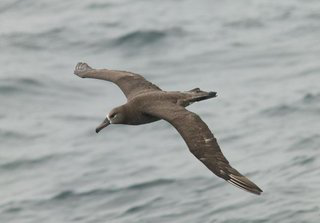

In [28]:
from PIL import Image

image = Image.open(imgPath+'images/001.Black_footed_Albatross/Black_Footed_Albatross_0001_796111.jpg')
image

In [29]:
image = transform(image)
image.unsqueeze_(0)
image = image.cuda()

model = bninception(dim)
model.load_state_dict(torch.load('softtriple_CUB-200_state.pth'))
model.cuda()
#model.eval()
new_picture_embedding = model.forward(image).data.cpu().numpy()
new_picture_embedding

UnpicklingError: invalid load key, '\xef'.

In [26]:
import numpy as np
train_embeddings_cl_df = pd.read_csv("softtriple_CUB-200_embedding_space.csv")
train_embeddings_cl = train_embeddings_cl_df.values.tolist()
image_list_df = pd.read_csv("softtriple_CUB-200_image_path.csv")

distance = []
I = []
for i in train_embeddings_cl:
    d=0
    for j in range(0,dim):
        d += np.power(new_picture_embedding[0][j] - i[j], 2)
    d = np.sqrt(d)
    distance.append(d)

for i in sorted(distance)[0:10]:
    I.append(distance.index(i)) 

print(I)

[4648, 4061, 2314, 5565, 467, 5252, 4842, 1952, 5623, 2395]


In [30]:
images = []
for i in I:
    print("imgPath:",image_list_df.iloc[i,0])
    print('imgClass',image_list_df.iloc[i,1])
    images.append(Image.open(image_list_df.iloc[i,0]))

imgPath: train1/080.Green_Kingfisher/Green_Kingfisher_0058_70998.jpg
imgClass 79
imgPath: train1/070.Green_Violetear/Green_Violetear_0086_795639.jpg
imgClass 69
imgPath: train1/041.Scissor_tailed_Flycatcher/Scissor_Tailed_Flycatcher_0055_42051.jpg
imgClass 40
imgPath: train1/096.Hooded_Oriole/Hooded_Oriole_0002_91034.jpg
imgClass 95
imgPath: train1/009.Brewer_Blackbird/Brewer_Blackbird_0104_2230.jpg
imgClass 8
imgPath: train1/090.Red_breasted_Merganser/Red_Breasted_Merganser_0070_79570.jpg
imgClass 89
imgPath: train1/083.White_breasted_Kingfisher/White_Breasted_Kingfisher_0111_73369.jpg
imgClass 82
imgPath: train1/035.Purple_Finch/Purple_Finch_0046_27295.jpg
imgClass 34
imgPath: train1/096.Hooded_Oriole/Hooded_Oriole_0129_90441.jpg
imgClass 95
imgPath: train1/042.Vermilion_Flycatcher/Vermilion_Flycatcher_0057_42562.jpg
imgClass 41


In [28]:
embedding_df = train_embeddings_cl_df.iloc[I,:]
embedding_df.to_csv('retrieval_embedding.tsv', header=None, sep='\t', index=False)

In [29]:
train_embeddings_cl_df.to_csv('train_embedding.tsv', header=None, sep='\t', index=False)

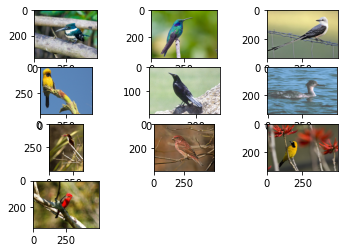

In [34]:
import matplotlib.pyplot as plt

for i in range(0,len(images)):
    plt.subplot(4,3,i+1)
    plt.imshow(images[i])